In [1]:
import os
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt
from dtw import dtw
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as hac
from collections import OrderedDict

In [2]:
def transform_ts(x, maxTT):

    minx = min(x)  
    x    = [xx - minx for xx in x] 
    maxx = max(x)
    x    = [xx * maxTT / maxx for xx in x]
    
    return x


def getBinnedDistribution(x, y, nbins):

    n, bins = np.histogram(x, bins=nbins)
    sy, _   = np.histogram(x, bins=nbins, weights=y)
    mean    = sy/n

    return _, mean

In [3]:
maturity   = 'senior_5_13'
method     = 'complete'
city       = 'london'
datafile   = 'FINAL_DATA/'
outfolder  = '../../ProcessedData/' + city + '/timeseries/' + maturity  
infile     = '../../ProcessedData/' + city + '/timeseries/senior_timeseries_5_13.dat'
venues_ts  = {}
lengths    = []

for ind, line in enumerate(open(infile)):
    fields = line.strip().split('\t')
    venue  = fields[0]
    ts     = fields[1:]
    venues_ts[venue] = savgol_filter(np.asarray([float(fff) for fff in ts  ] ), 5, 3) 
    lengths.append(len(ts))
    
print ind
len(venues_ts)

8378


8379

In [73]:
seniorsout = open(datafile + 'senior_venues_lists.dat', 'w')
for venid in venues_ts.keys():
    seniorsout.write(venid + '\n')
seniorsout.close()

<BarContainer object of 7 artists>

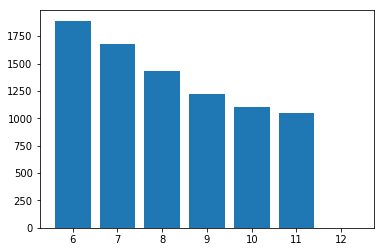

In [74]:
lengths_c = dict(Counter(lengths))
plt.bar(lengths_c.keys(), lengths_c.values())

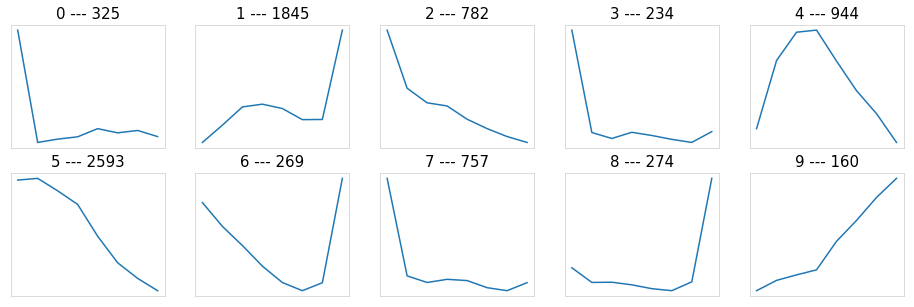

In [75]:
# 6_13    6461
# 5_13    8183

folder   = datafile + 'senior_5_13/avg_curves/10'
files    = [folder + '/' + f for f in os.listdir(folder) if '8183' in f]
f, ax    = plt.subplots(2, 5, figsize=(16, 5)) 
indicies = [(i,j) for i in range(2) for j in range(5)]

ys = set()
curve      = []
curvefiles = {}
numvenues  = []

for ind, fn in enumerate(files):
    with open(fn) as myfile:                
        x, y = myfile.read().strip().split('\n')
        x    = [float(xx) for xx in x.split('\t')]
        ys.add(y)
        curvefiles[y] = fn


curves, curvefiles2, labelvennum = zip(*[(yyy, curvefiles[yyy], curvefiles[yyy].split('=')[1].replace('.dat', '')) for yyy in list(ys) ])    
curves = [[float(yy) for yy in y.split('\t')]  for y in curves ]

 
   
for ind, c in enumerate(curves):
    bx =  ax[indicies[ind]] 
    bx.plot(x,c)  
    bx.set_title(str(ind) + ' --- ' + str(labelvennum[ind]), fontsize = 15)
    bx.spines['bottom'].set_color('lightgrey')
    bx.spines['top'].set_color('lightgrey')
    bx.spines['left'].set_color('lightgrey')
    bx.spines['right'].set_color('lightgrey')
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
              

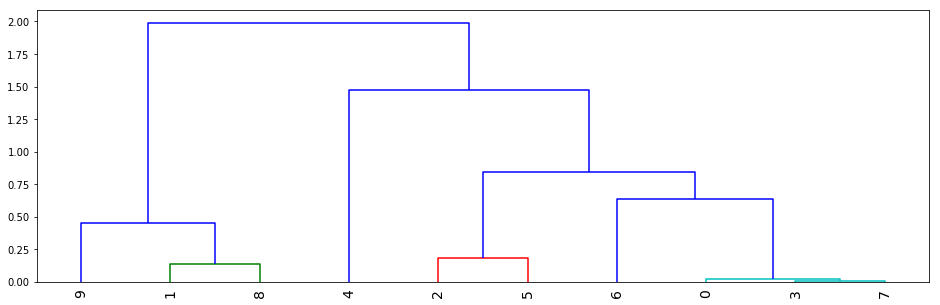

In [76]:
from dtw import dtw
from numpy.linalg import norm

f, ax    = plt.subplots(1, 1, figsize=(16, 5)) 
    
def mydist(p1, p2):
    
    p1 = np.asarray(p1).reshape(-1, 1)
    p2 = np.asarray(p2).reshape(-1, 1)

    dist, cost, acc, path = dtw(p2, p1, dist=lambda p1, p2: norm(p1 - p2, ord=1))

    return dist


Z = hac.linkage(curves, method='complete', metric='correlation')
d = hac.dendrogram( Z, ax = ax,color_threshold = 0.4,  leaf_rotation=90.,  leaf_font_size=14., show_leaf_counts = True, no_labels = False)
    

['FINAL_DATA/senior_5_13/avg_curves/10/avg_curve_1_8183_venuesnum=325.dat',
 'FINAL_DATA/senior_5_13/avg_curves/10/avg_curve_4_8183_venuesnum=1845.dat',
 'FINAL_DATA/senior_5_13/avg_curves/10/avg_curve_9_8183_venuesnum=782.dat',
 'FINAL_DATA/senior_5_13/avg_curves/10/avg_curve_3_8183_venuesnum=234.dat',
 'FINAL_DATA/senior_5_13/avg_curves/10/avg_curve_7_8183_venuesnum=944.dat',
 'FINAL_DATA/senior_5_13/avg_curves/10/avg_curve_8_8183_venuesnum=2593.dat',
 'FINAL_DATA/senior_5_13/avg_curves/10/avg_curve_0_8183_venuesnum=269.dat',
 'FINAL_DATA/senior_5_13/avg_curves/10/avg_curve_2_8183_venuesnum=757.dat',
 'FINAL_DATA/senior_5_13/avg_curves/10/avg_curve_6_8183_venuesnum=274.dat',
 'FINAL_DATA/senior_5_13/avg_curves/10/avg_curve_5_8183_venuesnum=160.dat']

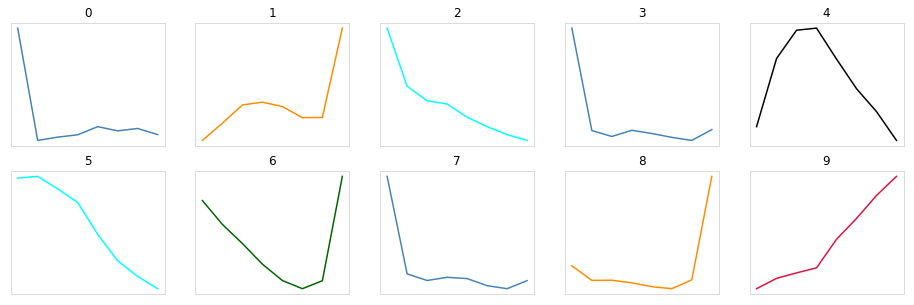

In [77]:
curves_clusters = { 0 : 'ephemeral',
                    1 : 'underdogs',
                    2 : 'fall',
                    3 : 'ephemeral',
                    4 : 'riseandfall',
                    5 : 'fall',
                    6 : 'fallandrise',
                    7 : 'ephemeral',
                    8 : 'underdogs',
                    9 : 'rise'}


clusters_colors = {  'ephemeral'   : 'steelblue',
                     'underdogs'   : 'darkorange',
                     'riseandfall' : 'k',
                     'fallandrise' : 'darkgreen',
                     'rise'        : 'crimson',
                     'fall'        : 'cyan'}


curves_files = {}
f, ax        = plt.subplots(2, 5, figsize=(16, 5)) 
indicies     = [(i,j) for i in range(2) for j in range(5)]
ys           = set()


for ind, fn in enumerate(files):
    with open(fn) as myfile:
        x, y = myfile.read().strip().split('\n')
        x = [float(xx) for xx in x.split('\t')]
        curves_files[y] = fn    
        ys.add(y)

        
curves = [[float(yy) for yy in y.split('\t')] for y in list(ys)]
 
for ind, c in enumerate(curves):
    
    color_ = clusters_colors[curves_clusters[ind]]
    ax[indicies[ind]].plot(x,c, color = color_)
    ax[indicies[ind]].set_title(str(ind))
    ax[indicies[ind]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ind]].spines['top'].set_color('lightgrey')
    ax[indicies[ind]].spines['left'].set_color('lightgrey')
    ax[indicies[ind]].spines['right'].set_color('lightgrey')
    ax[indicies[ind]].get_xaxis().set_visible(False)
    ax[indicies[ind]].get_yaxis().set_visible(False)
    
a=[f.split('avg_curve_')[1].split('_')[0] for f in curves_files.values()]


curves_files.values()

In [78]:
clusters_curves = {}

for curveid, cluster in curves_clusters.items():
    if cluster not in clusters_curves:
        clusters_curves[cluster] = [curveid]
    else:
        clusters_curves[cluster].append(curveid)
    
    
clusters_curves

{'ephemeral': [0, 3, 7],
 'fall': [2, 5],
 'fallandrise': [6],
 'rise': [9],
 'riseandfall': [4],
 'underdogs': [1, 8]}

In [79]:
venue_curve_files = {   0 : 'venues_in_1_8183.dat', 
                        6 : 'venues_in_0_8183.dat',
                        7 : 'venues_in_2_8183.dat',
                        3 : 'venues_in_3_8183.dat', 
                        1 : 'venues_in_4_8183.dat',
                        9 : 'venues_in_5_8183.dat', 
                        8 : 'venues_in_6_8183.dat',
                        4 : 'venues_in_7_8183.dat',
                        5 : 'venues_in_8_8183.dat',
                        2 : 'venues_in_9_8183.dat'}
      

269
269
160
160
2200
1316
944
944
4157
3375
3964
2119


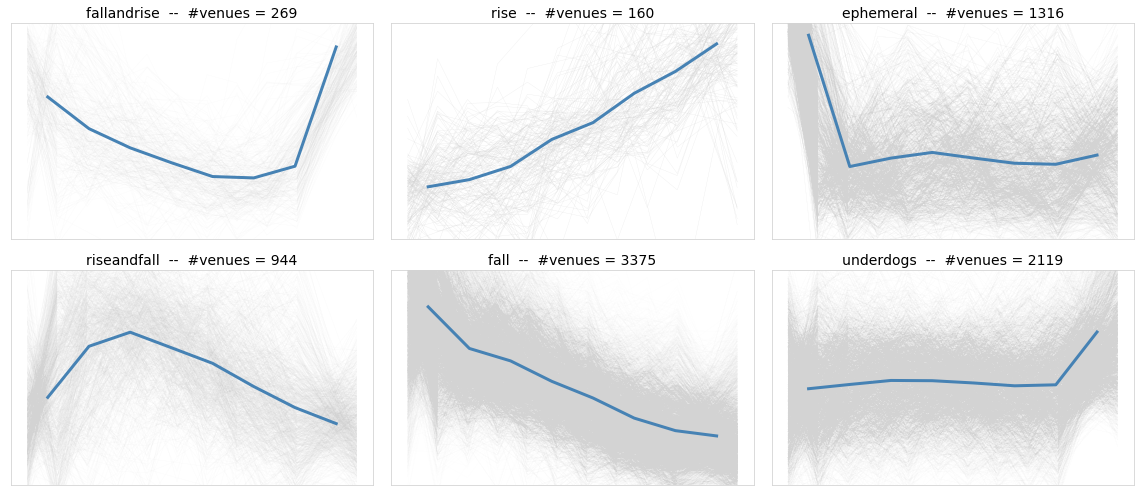

In [80]:
f, ax    = plt.subplots(2, 3, figsize=(16, 7)) 
indicies = [(i,j) for i in range(2) for j in range(3)]

clusters_venues   = {}
average_curves    = {}
average_curves_c  = {}


outfolder = 'Figures/datafiles/'
if not os.path.exists(outfolder):
    os.makedirs(outfolder)


for ind, (cluster, curveids) in enumerate(clusters_curves.items()):
    
    gout = open(outfolder + 'clusters_data_avg_' + cluster + '.dat', 'w')
    
    
    venues = []
    ttt = []
    sss = []
    
    clusters_venues[cluster] = []

    for curveid in curveids:
        
        venues += [line.strip() for line in open(datafile + 'senior_5_13/clusters_venues/10/' + venue_curve_files[curveid])]       

        alpha_ = 0.15
        if len(venues) > 1100:
            alpha_ = 0.04
        if len(venues) < 200:
            alpha_ = 0.55
         
        clusters_venues[cluster] += venues    
     
        for v in venues:
            y = venues_ts[v]
            x = transform_ts(range(len(y)), 11)   

            ttt += list(x)
            sss += list(y)
                 
            ax[indicies[ind]].plot(x, y, linewidth = 0.25, color = 'lightgrey', alpha = alpha_)
     
    print len(clusters_venues[cluster])
    clusters_venues[cluster] = list(set(clusters_venues[cluster])) 
    print len(clusters_venues[cluster])
    
    
    
    bx, by = getBinnedDistribution(ttt, sss, 8  )
    bx     = (bx[1:] + bx[:-1])/2
    
    ax[indicies[ind]].set_title(cluster + '  --  #venues = ' + str(len(clusters_venues[cluster])), fontsize = 14)
    ax[indicies[ind]].plot(bx, by, linewidth = 3, color = 'steelblue')          

    
    gout.write('\n'.join([(str(bx[i]) + '\t' + str(by[i]))  for i in range(len(bx))]) + '\n')

    gout.close()
    
    
    average_curves[ind]       = (bx, by)
    average_curves_c[cluster] = (bx, by)


    ax[indicies[ind]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ind]].spines['top'].set_color('lightgrey')
    ax[indicies[ind]].spines['left'].set_color('lightgrey')
    ax[indicies[ind]].spines['right'].set_color('lightgrey')
    ax[indicies[ind]].get_xaxis().set_visible(False)
    ax[indicies[ind]].get_yaxis().set_visible(False)    
    ax[indicies[ind]].set_ylim([0.2,1.8])       
     

plt.tight_layout()
plt.savefig('FINAL_FIGURES/4_clusters')   

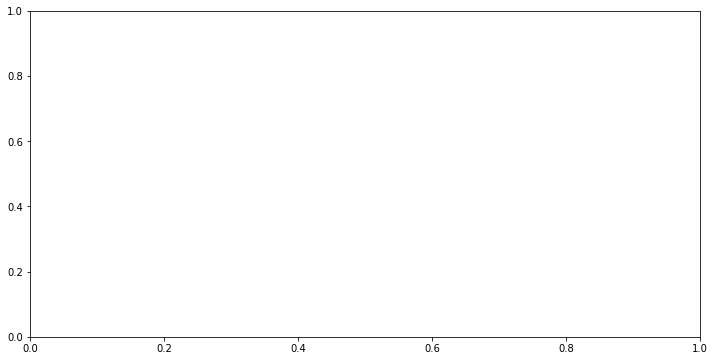

In [81]:
f, ax = plt.subplots(1,1,figsize = (12,6))


for ind, (cluster, venues) in enumerate(clusters_venues.items()):
  
    outfolder = 'Figures/datafiles/' + cluster
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
        
    for v in venues:

        fout = open(outfolder + '/' + v + '.dat', 'w')  
     
        y = venues_ts[v]
        x = transform_ts(range(len(y)), 11)   
        fout.write('\n'.join([(str(x[i]) + '\t' + str(y[i]))  for i in range(len(x))]) + '\n')

        #ax.plot(x,y, linewidth = 0.4, alpha = 0.4)

    fout.close()

# Save cluster avg curces and venue list, also w distance from the centroid

In [82]:
folderout = datafile + 'senior_5_13/clustering_results/'
if not os.path.exists(folderout):
    os.makedirs(folderout)
        
 
for cluster, (bx, by) in average_curves_c.items():    
    fout = open(folderout + 'avg_curve_' + cluster + '.dat', 'w')
    fout.write('\t'.join([str(t) for t in bx]) + '\n')
    fout.write('\t'.join([str(t) for t in by]) + '\n')
    fout.close()



In [83]:
folderout = datafile + 'senior_5_13/clustering_results/'
gout      = open(folderout + 'venues_clusters.dat', 'w')


for cluster, venues in clusters_venues.items():
    fout = open(folderout + 'venues_in_' + cluster + '.dat', 'w')
    fout.write('\n'.join(venues) + '\n')
    fout.close()
    
    for v in venues:
        gout.write(v + '\t' + cluster + '\n')
        
gout.close()
    

In [84]:
clusters_venues_dist   = {}
clusters_venues_dist_s = {}


for ind, (cluster, (x, avgcurve) ) in enumerate(average_curves_c.items()):
        
    clusters_venues_dist[cluster] = []
    venues = clusters_venues[cluster]

    for jind, venue in enumerate(venues):

        t1 = np.asarray(avgcurve).reshape(-1,1)
        t2 = np.asarray(venues_ts[venue]).reshape(-1,1)

        dist, cost, acc, path = dtw(t1, t2, dist=lambda x, y: norm(x - y, ord=1))                
        clusters_venues_dist[cluster].append((venue, dist))    

In [85]:
for cluster, venues_dist in clusters_venues_dist.items():
    
    fout        = open(folderout + 'sorted_dist_venues_in_' + cluster + '.dat', 'w')
    venues_dist = sorted(venues_dist, key=lambda tup: tup[1])
    
    for vd in venues_dist:
        fout.write(vd[0] + '\t' + str(vd[1]) + '\n')
    fout.close()
